In [13]:
import pandas as pd

# Chargement des données
file_path = 'Flux Crediteur_2021_2024_v1.xlsx'
data = pd.read_excel(file_path)

# Convertir la colonne 'Date' en format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extraire l'année et le mois
data['Année'] = data['Date'].dt.year
data['Mois'] = data['Date'].dt.month

# Afficher les premières lignes après transformation
data.head()


Clients Nom client       Date         mcfa  Année  Mois
0      830     SNSSS  2021-01-01   93212400.0   2021     1
1      830     SNSSS  2021-02-01   17600000.0   2021     2
2      830     SNSSS  2021-03-01  117181154.0   2021     3
3      830     SNSSS  2021-04-01   74013400.0   2021     4
4      830     SNSSS  2021-05-01   71750000.0   2021     5

In [14]:
# Statistiques de base
statistiques = data.describe()

# Nombre total d'opérations par année
operations_par_annee = data.groupby('Année').size()

# Montant total des flux par année
montant_par_annee = data.groupby('Année')['mcfa'].sum()

# Afficher les résultats
print("Statistiques de base :\n", statistiques)
print("\nNombre total d'opérations par année :\n", operations_par_annee)
print("\nMontant total des flux par année :\n", montant_par_annee)


Statistiques de base :
             Clients                           Date          mcfa  \
count  9.339500e+04                          93395  9.339500e+04   
mean   2.697562e+07  2022-09-07 23:11:06.498206464  1.379283e+08   
min    8.300000e+02            2021-01-01 00:00:00  0.000000e+00   
25%    1.565530e+07            2021-11-01 00:00:00  0.000000e+00   
50%    2.599561e+07            2022-09-01 00:00:00  0.000000e+00   
75%    2.608519e+07            2023-08-01 00:00:00  2.625145e+07   
max    8.518773e+07            2024-05-01 00:00:00  1.198301e+11   
std    1.725654e+07                            NaN  1.122823e+09   

              Année          Mois  
count  93395.000000  93395.000000  
mean    2022.265689      6.053483  
min     2021.000000      1.000000  
25%     2021.000000      3.000000  
50%     2022.000000      6.000000  
75%     2023.000000      9.000000  
max     2024.000000     12.000000  
std        1.012351      3.466280  

Nombre total d'opérations par année :


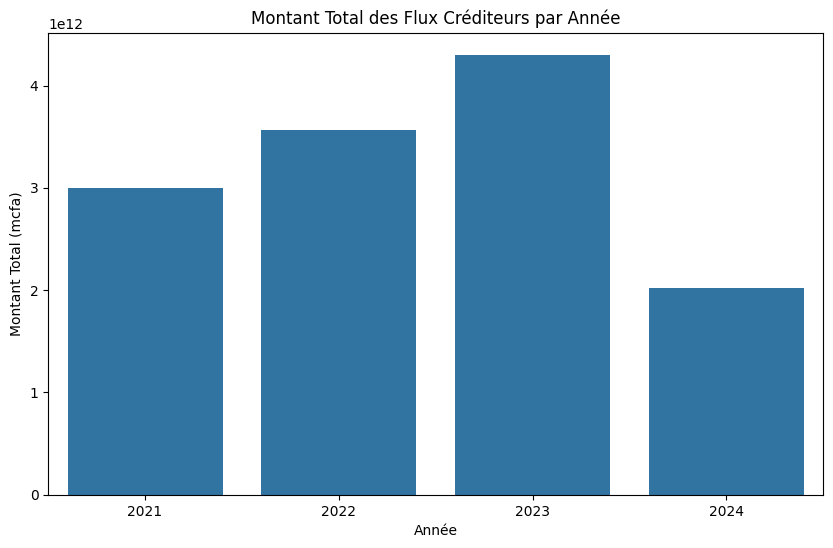

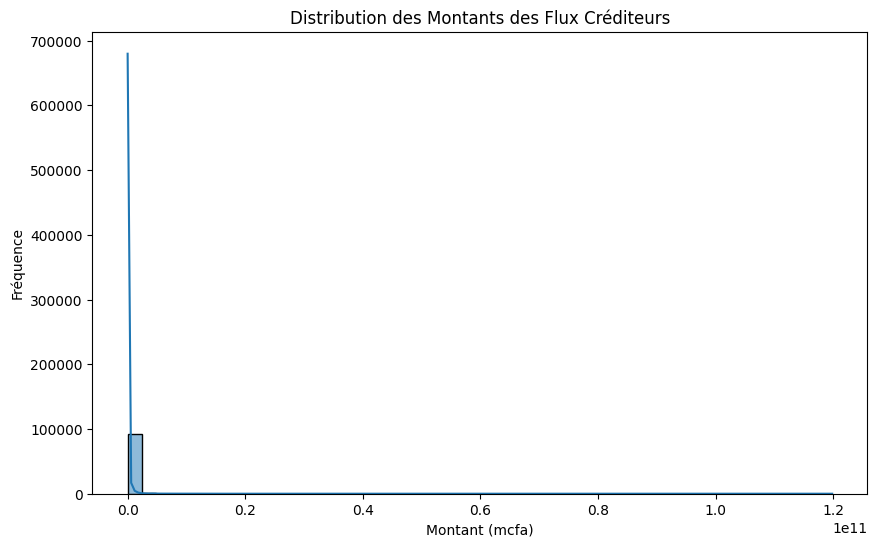

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Montant total des flux par année
plt.figure(figsize=(10, 6))
sns.barplot(x=montant_par_annee.index, y=montant_par_annee.values)
plt.title('Montant Total des Flux Créditeurs par Année')
plt.xlabel('Année')
plt.ylabel('Montant Total (mcfa)')
plt.show()

# Distribution des montants des flux
plt.figure(figsize=(10, 6))
sns.histplot(data['mcfa'], bins=50, kde=True)
plt.title('Distribution des Montants des Flux Créditeurs')
plt.xlabel('Montant (mcfa)')
plt.ylabel('Fréquence')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8112\1142249901.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Montant Total (mcfa)', y='Nom du Client', data=top_10_clients_df, palette='viridis')


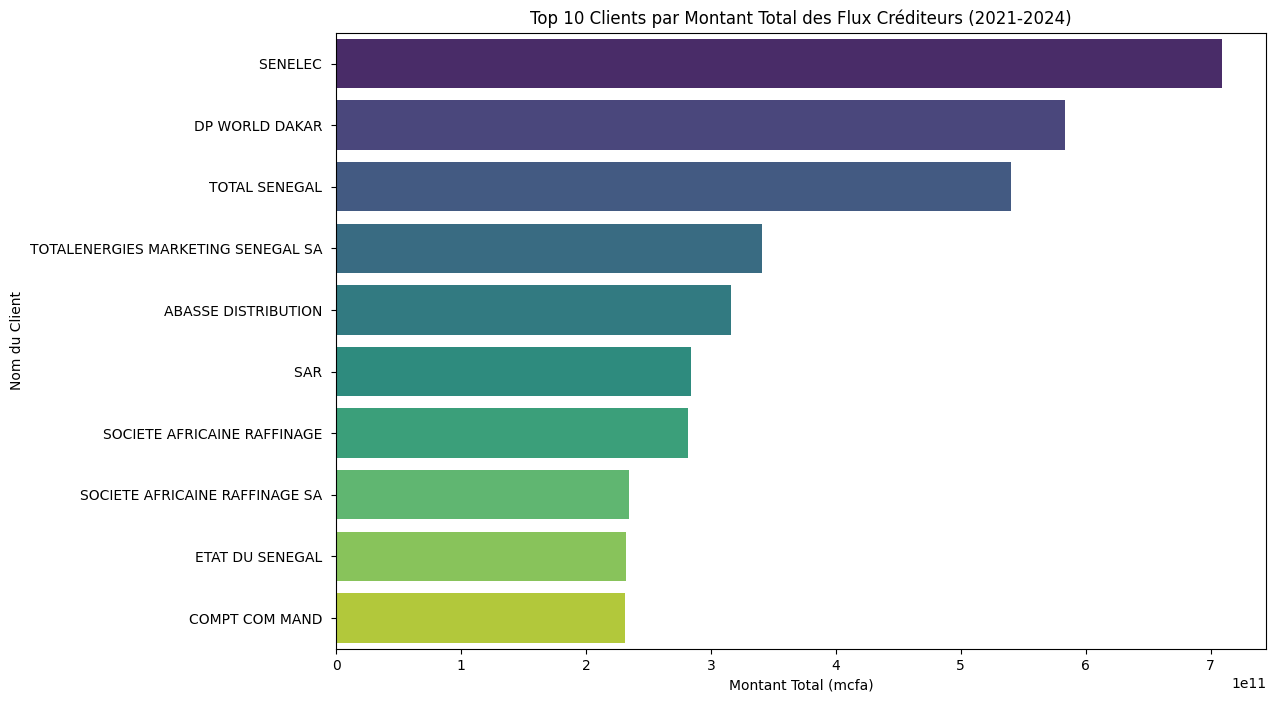

In [16]:
# Calculer le montant total des flux par client
montant_par_client = data.groupby('Clients')['mcfa'].sum().sort_values(ascending=False)

# Sélectionner les 10 meilleurs clients par montant total
top_10_clients = montant_par_client.head(10)

# Obtenir les noms des clients pour les 10 meilleurs
top_10_clients_names = data[data['Clients'].isin(top_10_clients.index)][['Clients', 'Nom client']].drop_duplicates()
top_10_clients_names = top_10_clients_names.set_index('Clients').loc[top_10_clients.index]['Nom client'].head(10)

# Recalculer le DataFrame top_10_clients_df
top_10_clients_df = pd.DataFrame({'Montant Total (mcfa)': top_10_clients.values, 'Nom du Client': top_10_clients_names.values})

# Afficher le graphique des top 10 clients par montant total
plt.figure(figsize=(12, 8))
sns.barplot(x='Montant Total (mcfa)', y='Nom du Client', data=top_10_clients_df, palette='viridis')
plt.title('Top 10 Clients par Montant Total des Flux Créditeurs (2021-2024)')
plt.xlabel('Montant Total (mcfa)')
plt.ylabel('Nom du Client')
plt.show()

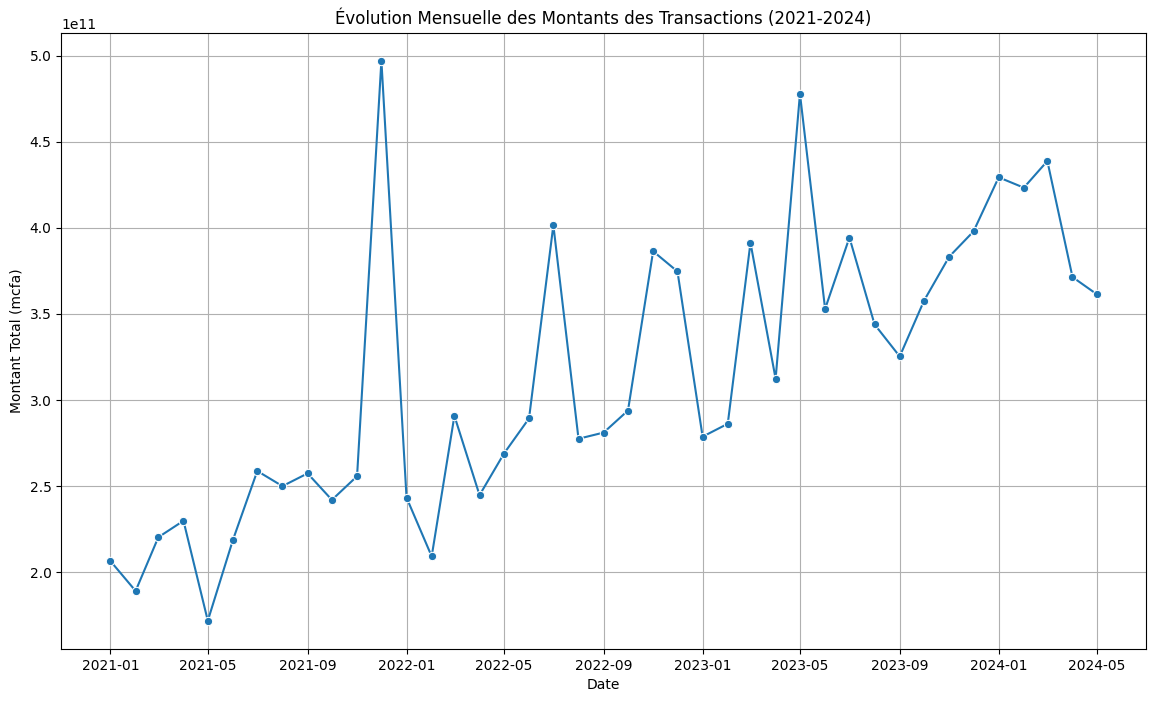

In [17]:
# Calculer le montant total des transactions par mois
montant_par_mois = data.groupby(['Année', 'Mois'])['mcfa'].sum().reset_index()

# Créer une colonne 'Date' pour faciliter la visualisation
montant_par_mois['Date'] = pd.to_datetime(montant_par_mois['Année'].astype(str) + '-' + montant_par_mois['Mois'].astype(str) + '-01')

# Afficher le graphique de l'évolution mensuelle des montants des transactions
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='mcfa', data=montant_par_mois, marker='o')
plt.title('Évolution Mensuelle des Montants des Transactions (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Montant Total (mcfa)')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8112\2442728574.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  montant_top_10_clients['Date'] = pd.to_datetime(montant_top_10_clients['Année'].astype(str) + '-' + montant_top_10_clients['Mois'].astype(str) + '-01')


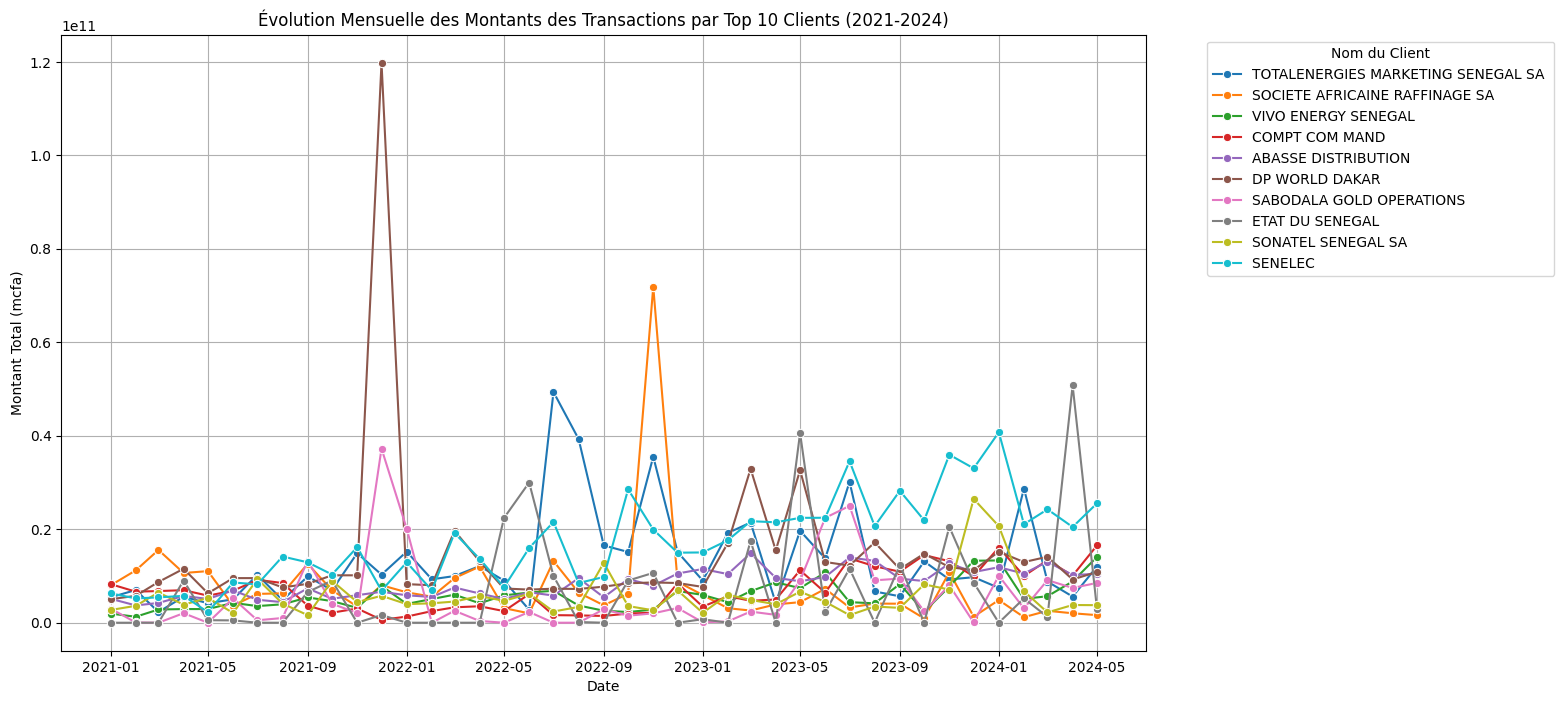

In [18]:
# Calculer le montant total des transactions par client et par mois
montant_par_client_mois = data.groupby(['Clients', 'Année', 'Mois'])['mcfa'].sum().reset_index()

# Sélectionner les 10 meilleurs clients par montant total
top_10_clients = montant_par_client_mois.groupby('Clients')['mcfa'].sum().sort_values(ascending=False).head(10).index

# Filtrer les données pour inclure uniquement les 10 meilleurs clients
montant_top_10_clients = montant_par_client_mois[montant_par_client_mois['Clients'].isin(top_10_clients)]

# Créer une colonne 'Date' pour faciliter la visualisation
montant_top_10_clients['Date'] = pd.to_datetime(montant_top_10_clients['Année'].astype(str) + '-' + montant_top_10_clients['Mois'].astype(str) + '-01')

# Obtenir les noms des clients pour les 10 meilleurs
client_names = data[['Clients', 'Nom client']].drop_duplicates().set_index('Clients')
montant_top_10_clients = montant_top_10_clients.join(client_names, on='Clients')

# Supprimer les doublons en conservant le dernier enregistrement
montant_top_10_clients_unique = montant_top_10_clients.drop_duplicates(subset=['Clients', 'Date'], keep='last')

# Afficher le graphique de l'évolution mensuelle des montants des transactions par top client
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='mcfa', hue='Nom client', data=montant_top_10_clients_unique, marker='o')
plt.title('Évolution Mensuelle des Montants des Transactions par Top 10 Clients (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Montant Total (mcfa)')
plt.legend(title='Nom du Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8112\948700017.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Différence', y='Nom client', data=top_10_diminution, palette='coolwarm')
C:\Users\user\AppData\Local\Temp\ipykernel_8112\948700017.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Différence', y='Nom client', data=top_10_augmentation, palette='coolwarm')


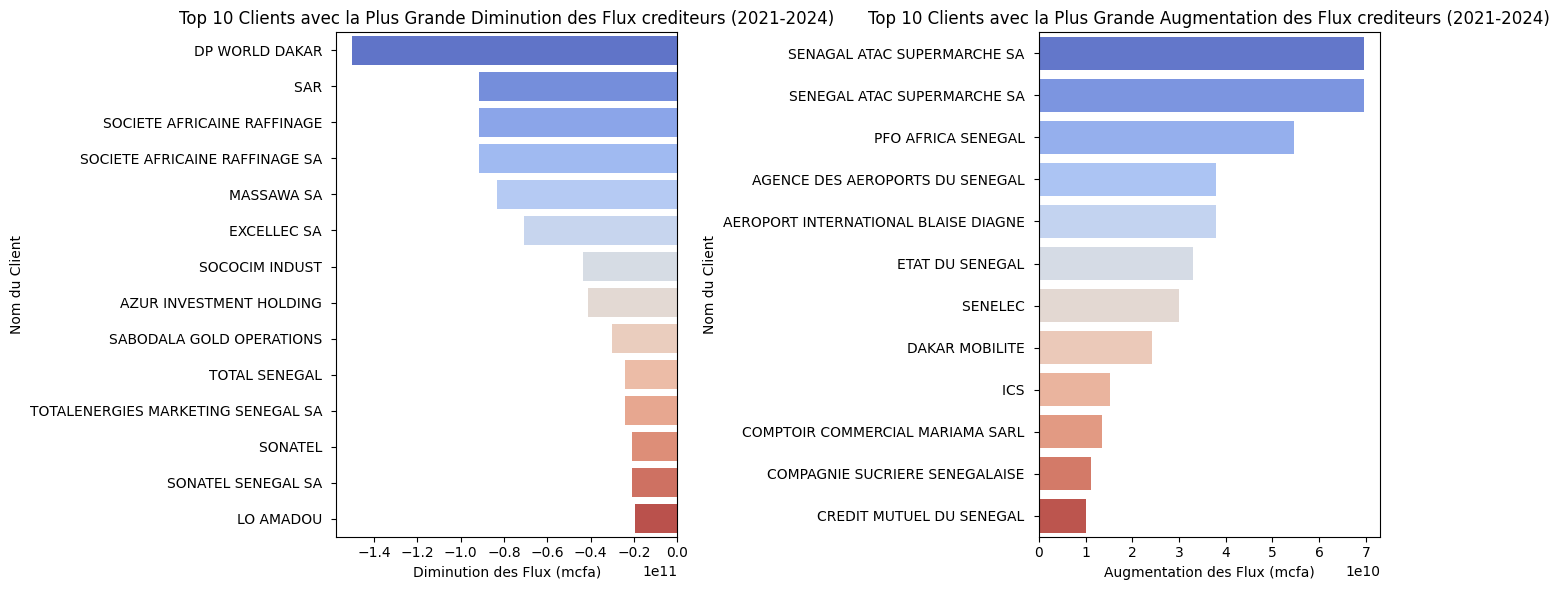

In [22]:
# Calculer les montants totaux par client pour chaque année
montant_par_client_annee = data.groupby(['Clients', 'Année'])['mcfa'].sum().unstack().fillna(0)

# Calculer la différence des montants entre 2021 et 2024
montant_par_client_annee['Différence'] = montant_par_client_annee[2024] - montant_par_client_annee[2021]

# Top 10 clients avec la plus grande diminution des flux
top_10_diminution = montant_par_client_annee.nsmallest(10, 'Différence')[['Différence']]

# Top 10 clients avec la plus grande augmentation des flux
top_10_augmentation = montant_par_client_annee.nlargest(10, 'Différence')[['Différence']]

# Obtenir les noms des clients
client_names = data[['Clients', 'Nom client']].drop_duplicates().set_index('Clients')
top_10_diminution = top_10_diminution.join(client_names)
top_10_augmentation = top_10_augmentation.join(client_names)

# Réinitialiser les index pour éviter les doublons
top_10_diminution = top_10_diminution.reset_index()
top_10_augmentation = top_10_augmentation.reset_index()

# Afficher les résultats
#print("Top 10 Clients avec la Plus Grande Diminution des Flux (2021-2024):")
#print(top_10_diminution)

#print("\nTop 10 Clients avec la Plus Grande Augmentation des Flux (2021-2024):")
#print(top_10_augmentation)

# Graphiques
plt.figure(figsize=(14, 6))

# Graphique pour la diminution des flux
plt.subplot(1, 2, 1)
sns.barplot(x='Différence', y='Nom client', data=top_10_diminution, palette='coolwarm')
plt.title('Top 10 Clients avec la Plus Grande Diminution des Flux crediteurs (2021-2024)')
plt.xlabel('Diminution des Flux (mcfa)')
plt.ylabel('Nom du Client')

# Graphique pour l'augmentation des flux
plt.subplot(1, 2, 2)
sns.barplot(x='Différence', y='Nom client', data=top_10_augmentation, palette='coolwarm')
plt.title('Top 10 Clients avec la Plus Grande Augmentation des Flux crediteurs (2021-2024)')
plt.xlabel('Augmentation des Flux (mcfa)')
plt.ylabel('Nom du Client')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8112\1248173447.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mcfa', y='Nom client', data=top_10_nouveaux_clients, palette='Set1')


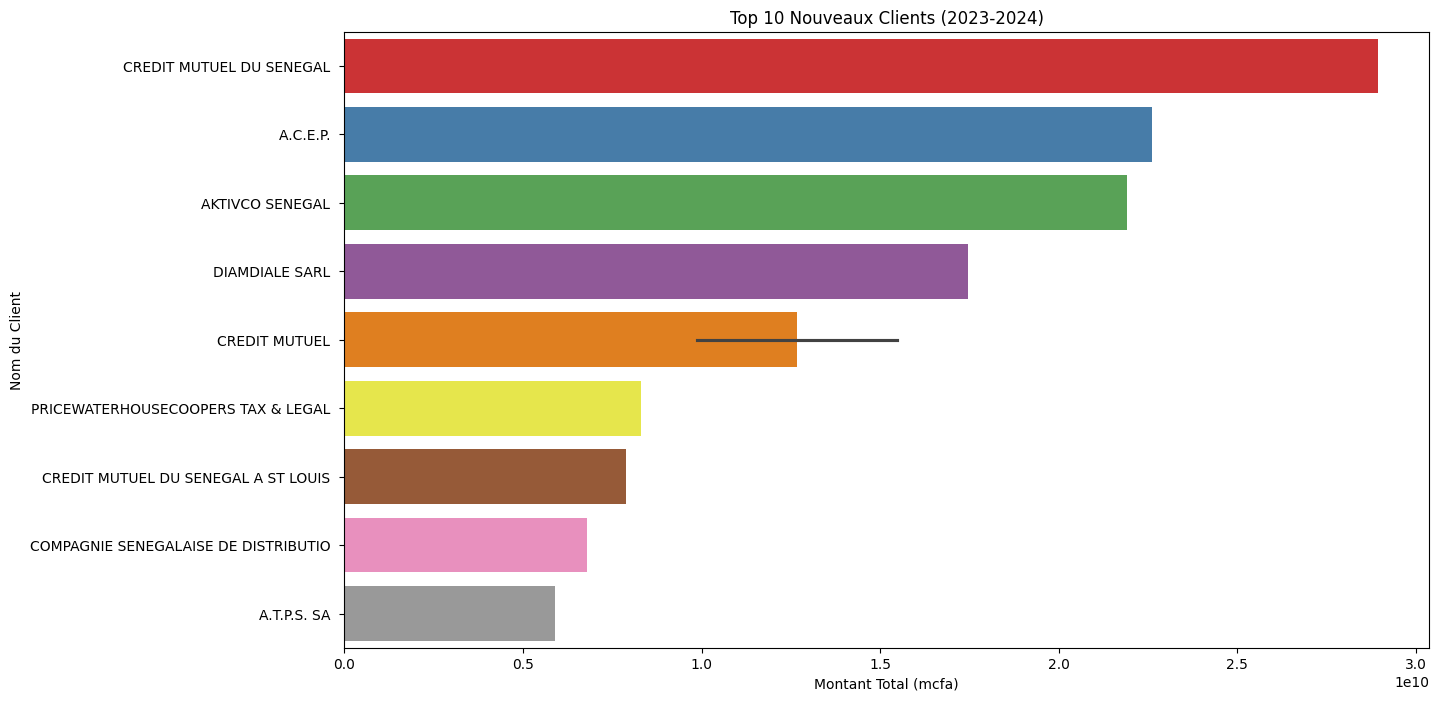

In [24]:
# Identifier les nouveaux clients (ceux qui n'ont pas de transactions avant 2023)
clients_pre_2023 = data[data['Année'] < 2023]['Clients'].unique()
nouveaux_clients = data[(data['Année'] >= 2023) & (~data['Clients'].isin(clients_pre_2023))]

# Calculer les montants totaux des transactions pour les nouveaux clients en 2023 et 2024
montant_nouveaux_clients = nouveaux_clients.groupby('Clients')['mcfa'].sum().reset_index()

# Sélectionner les top 10 nouveaux clients par montant total
top_10_nouveaux_clients = montant_nouveaux_clients.nlargest(10, 'mcfa')

# Obtenir les noms des clients
client_names = data[['Clients', 'Nom client']].drop_duplicates().set_index('Clients')
top_10_nouveaux_clients = top_10_nouveaux_clients.join(client_names, on='Clients')

# Afficher les résultats
#print("Top 10 Nouveaux Clients (2023-2024):")
#print(top_10_nouveaux_clients)

# Graphique
plt.figure(figsize=(14, 8))
sns.barplot(x='mcfa', y='Nom client', data=top_10_nouveaux_clients, palette='Set1')
plt.title('Top 10 Nouveaux Clients (2023-2024)')
plt.xlabel('Montant Total (mcfa)')
plt.ylabel('Nom du Client')
plt.show()

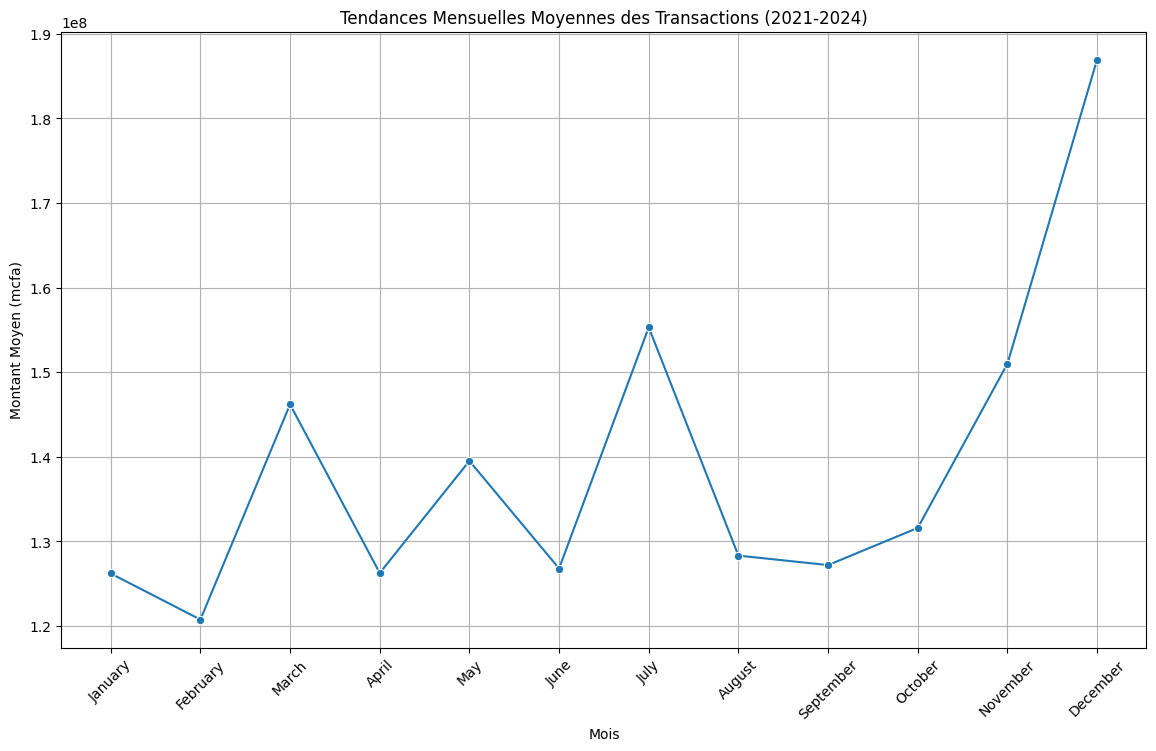

In [21]:
# Calculer les moyennes mensuelles des transactions
moyennes_mensuelles = data.groupby('Mois')['mcfa'].mean().reset_index()

# Créer un dictionnaire pour mapper les mois de nombre à nom
mois_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
moyennes_mensuelles['Mois'] = moyennes_mensuelles['Mois'].map(mois_dict)

# S'assurer que les mois sont dans le bon ordre
moyennes_mensuelles['Mois'] = pd.Categorical(moyennes_mensuelles['Mois'], categories=list(mois_dict.values()), ordered=True)
moyennes_mensuelles = moyennes_mensuelles.sort_values('Mois')

# Afficher les résultats
#print("Moyennes Mensuelles des Transactions:")
#print(moyennes_mensuelles)

# Graphique des tendances mensuelles moyennes
plt.figure(figsize=(14, 8))
sns.lineplot(x='Mois', y='mcfa', data=moyennes_mensuelles, marker='o')
plt.title('Tendances Mensuelles Moyennes des Transactions (2021-2024)')
plt.xlabel('Mois')
plt.ylabel('Montant Moyen (mcfa)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()